# Billboard

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [11]:
top_two = c('Independent Women Pa...', 'Maria, Maria')

Plot week versus rank for the top two songs by number of weeks at rank #1.

In [21]:
df = billboard %>% 
    pivot_longer(cols = -one_of('artist', 'track', 'date.entered'),
                 names_to = 'week', values_to = 'rank') %>%
    filter(track %in% top_two) %>%
    extract(week,'week.number', 'wk([0-9]*[0-9]*)') %>%
    mutate(week.number = as.numeric(week.number)) %>%
    print

# Changed week to numberic form to allow for sorting

# A tibble: 152 x 5
   artist          track                   date.entered week.number  rank
   <chr>           <chr>                   <date>             <dbl> <dbl>
 1 Destiny's Child Independent Women Pa... 2000-09-23             1    78
 2 Destiny's Child Independent Women Pa... 2000-09-23             2    63
 3 Destiny's Child Independent Women Pa... 2000-09-23             3    49
 4 Destiny's Child Independent Women Pa... 2000-09-23             4    33
 5 Destiny's Child Independent Women Pa... 2000-09-23             5    23
 6 Destiny's Child Independent Women Pa... 2000-09-23             6    15
 7 Destiny's Child Independent Women Pa... 2000-09-23             7     7
 8 Destiny's Child Independent Women Pa... 2000-09-23             8     5
 9 Destiny's Child Independent Women Pa... 2000-09-23             9     1
10 Destiny's Child Independent Women Pa... 2000-09-23            10     1
# … with 142 more rows


Warning message:
“Removed 98 rows containing missing values (geom_point).”


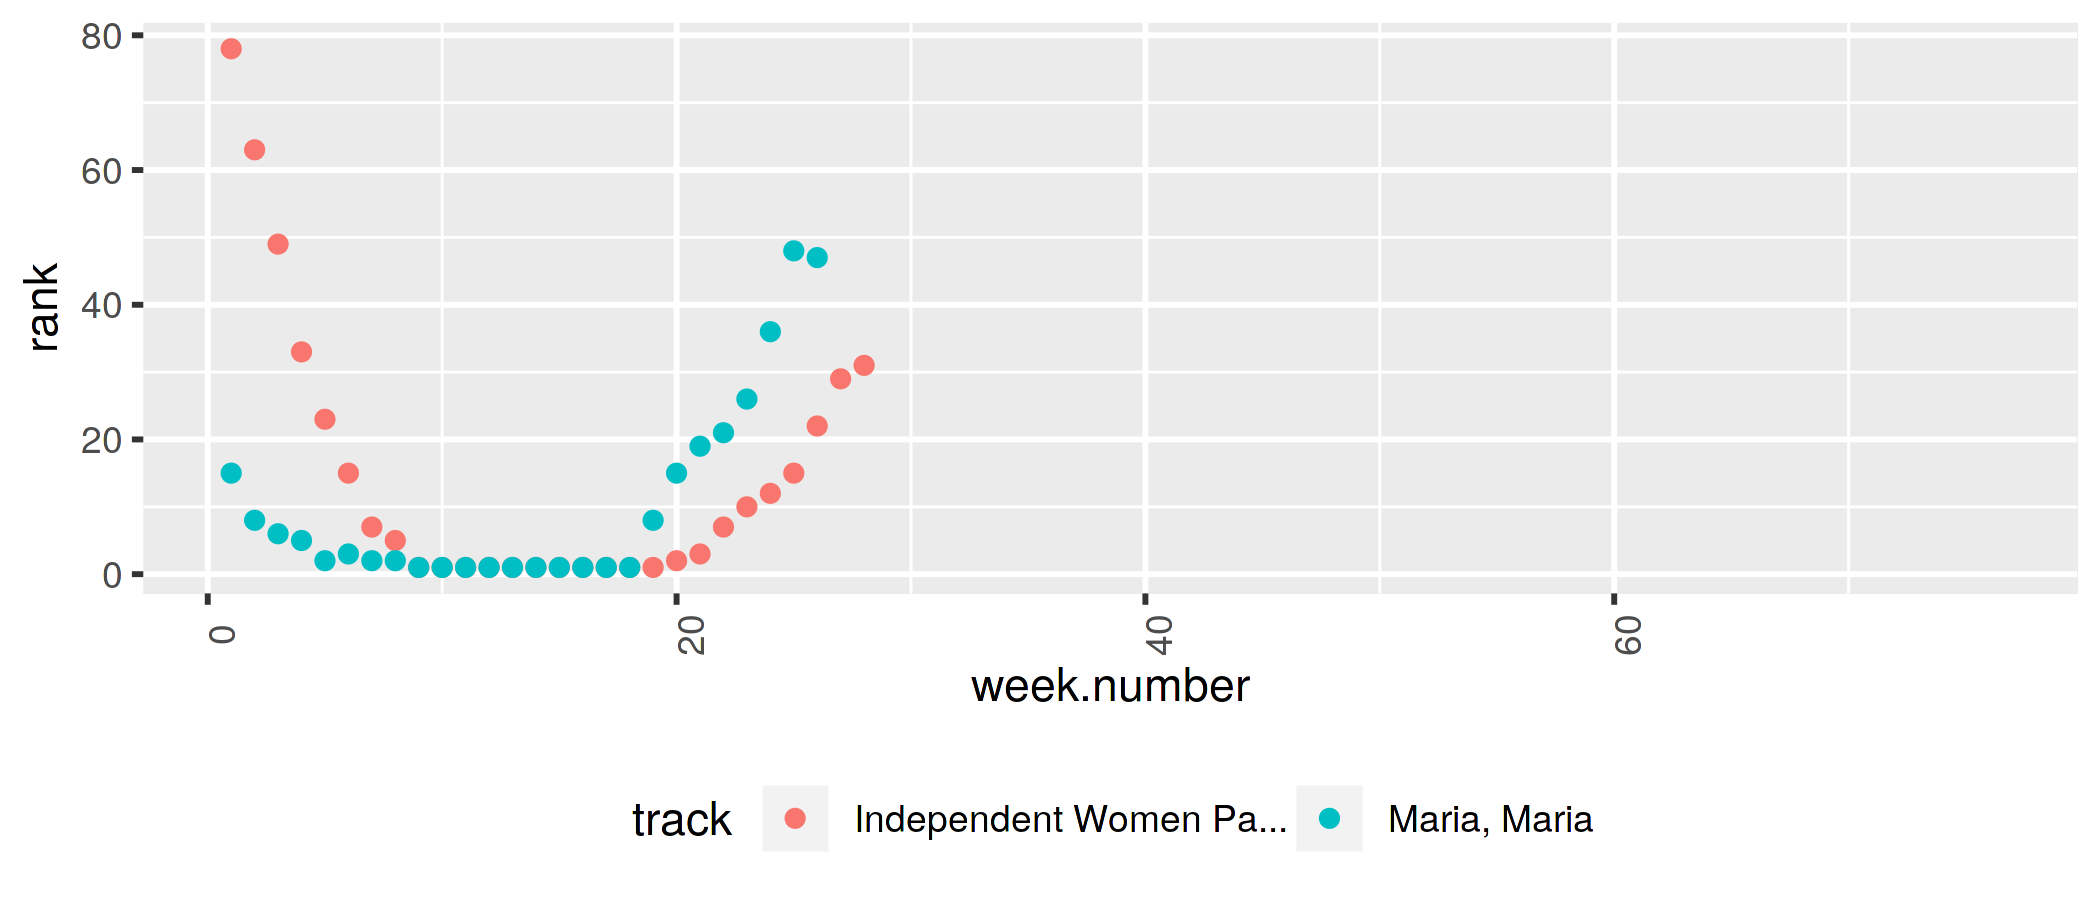

In [22]:
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res=300)
p = ggplot(df, aes(x=week.number, y=rank, color=track))
p = p + geom_point()
p = p + theme(axis.text.x = element_text(angle=90), legend.position = 'bottom')
p

# Candy ranking

[https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking)

In [24]:
candy = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')
candy %>% head(5)

Parsed with column specification:
cols(
  competitorname = col_character(),
  chocolate = col_double(),
  fruity = col_double(),
  caramel = col_double(),
  peanutyalmondy = col_double(),
  nougat = col_double(),
  crispedricewafer = col_double(),
  hard = col_double(),
  bar = col_double(),
  pluribus = col_double(),
  sugarpercent = col_double(),
  pricepercent = col_double(),
  winpercent = col_double()
)



competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146


In [43]:
# candy_summation = candy %>% 
#     select(-one_of('sugarpercent', 'pricepercent', 'winpercent')) %>%
#     pivot_longer(cols = -'competitorname', names_to='component', values_to='contains') %>%
#     group_by(component) %>%
#     summarize(count=sum(contains))

candy_summation = candy %>%
    pivot_longer(cols = -one_of('competitorname',
                                'sugarpercent',
                                'pricepercent',
                                'winpercent')) %>%
    filter(value>0) %>%
    mutate(name = fct_infreq(name))
candy_summation %>% head(5)

competitorname,sugarpercent,pricepercent,winpercent,name,value
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
100 Grand,0.732,0.860,66.97173,chocolate,1
100 Grand,0.732,0.860,66.97173,caramel,1
100 Grand,0.732,0.860,66.97173,crispedricewafer,1
100 Grand,0.732,0.860,66.97173,bar,1
3 Musketeers,0.604,0.511,67.60294,chocolate,1


Plot the frequecy count of each candy component in the data.

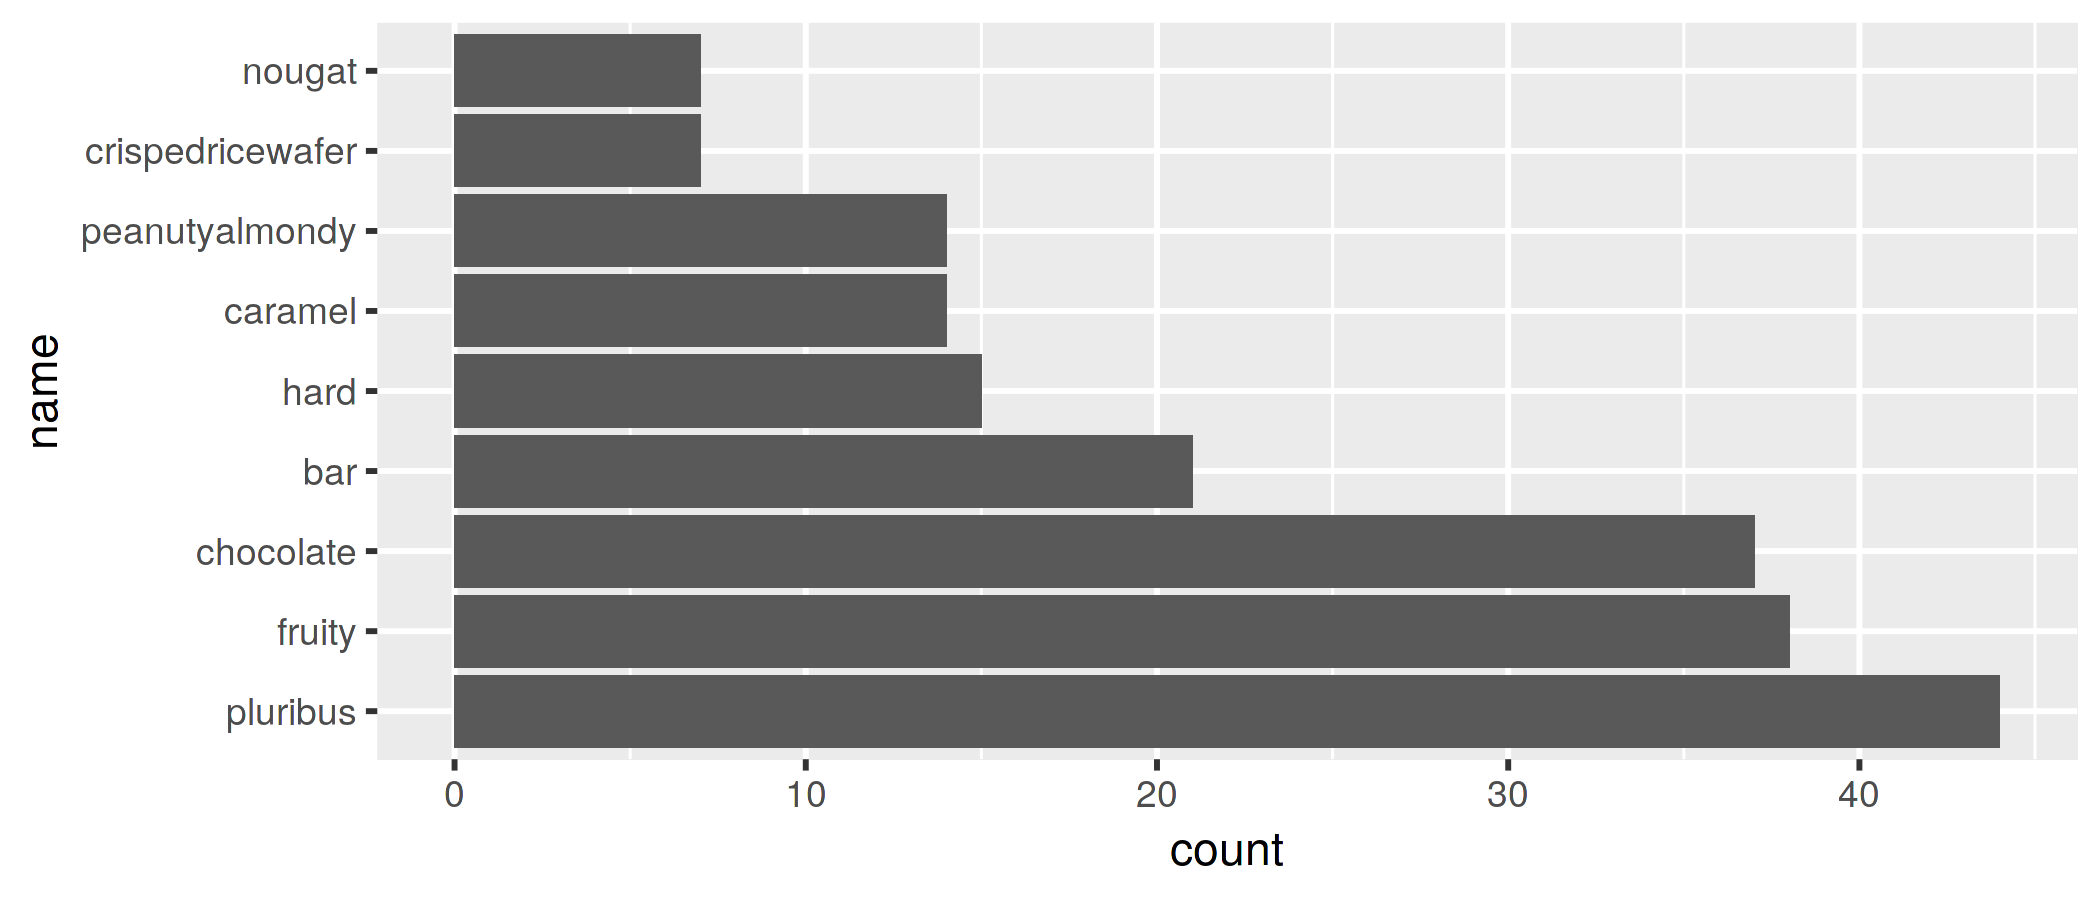

In [44]:
p = ggplot(candy_summation, aes(x=name))
p = p + geom_bar()
p = p + coord_flip()
p

Bonus: can you order the candy components by descending count?

In [32]:
?geom_bar

# Marriage

[https://github.com/fivethirtyeight/data/tree/master/marriage](https://github.com/fivethirtyeight/data/tree/master/marriage)

In [48]:
sexes = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/both_sexes.csv')
sexes %>% head(5)

sexes %>%
    pivot_longer(cols = -one_of('X1', 'year', 'date'),
                 names_to='demo',
                 values_to='frac_nvr_married') %>%
    

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

See spec(...) for full column specifications.



X1,year,date,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,White_2534,⋯,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,1960-01-01,0.1233145,0.1095332,0.1522818,0.2389952,0.2389952,NA,0.1164848,⋯,0.001150824,0.0005751073,0.0005751073,NA,0.4933061,0.4100080,0.4921184,0.008722711,0.0007532065,0.0008027331
2,1970,1970-01-01,0.1269715,0.1094000,0.1495096,0.2187031,0.2187031,NA,0.1179043,⋯,0.003699982,0.0014683425,0.0014683425,NA,0.5097742,0.3764538,0.4288948,0.029974945,0.0033771145,0.0030435661
3,1980,1980-01-01,0.1991767,0.1617313,0.2236916,0.2881646,0.2881646,NA,0.1824126,⋯,0.018135401,0.0062544364,0.0062544364,NA,0.5740402,0.3998250,0.3848089,0.077926214,0.0102368871,0.0068317224
4,1990,1990-01-01,0.2968306,0.2777491,0.2780912,0.3612968,0.3656655,0.3474505,0.2639256,⋯,0.052032702,0.0171241042,0.0181766027,0.01374234,0.6546908,0.5186604,0.4750156,0.170763774,0.0274655254,0.0182329127
5,2000,2000-01-01,0.3450087,0.3316545,0.3249205,0.3874906,0.3939579,0.3691740,0.3127149,⋯,0.097625310,0.0370024452,0.0401009875,0.02761467,0.7055451,0.5690228,0.4458023,0.256281918,0.0597845173,0.0295644698


X1,year,date,demo,frac_nvr_married
<dbl>,<dbl>,<date>,<chr>,<dbl>
1,1960,1960-01-01,all_2534,0.1233145
1,1960,1960-01-01,HS_2534,0.1095332
1,1960,1960-01-01,SC_2534,0.1522818
1,1960,1960-01-01,BAp_2534,0.2389952
1,1960,1960-01-01,BAo_2534,0.2389952


Use `both_sexes.csv`. Which age/demographic category has the highest fraction of people that have never been married?

How would you plot age range versus fraction of people never married?

# Airlines

[https://github.com/fivethirtyeight/data/tree/master/airline-safety](https://github.com/fivethirtyeight/data/tree/master/airline-safety)

Which airline had the fewest incidents or fatal accidents from '89-'14?

Have do the number fatal accidents compare between the periods '89-'99 and '00-'14?

# Unisex names

[https://github.com/fivethirtyeight/data/tree/master/unisex-names](https://github.com/fivethirtyeight/data/tree/master/unisex-names)

Recreate the following figure using `unisex_names_table.csv`:

<img src="https://fivethirtyeight.com/wp-content/uploads/2015/06/flowers-datalab-unisexnames-1.png?w=1150" style="width: 500px;" />